# Big project

## Submission

Submit solutions to https://forms.office.com/e/WexY7YraJb.

1.   Upload code in .ipynb file
2.   Upload a csv containing three columns: 
*    "ID": the ID of the instance (1, 2, 3, ...)
*    "OBJ": the objective function value obtained
*    "TIME": the execution time in seconds.

## Evaluation

1.   Gap w.r.t. optimal solutions
2.   Runtimes. Must be under 10 minutes for every instance. Execution times will be re-examined on a random basis.

## Deadline

12/01/2022 23:59 CET

## Other

*   4 lab points just if you deliver something that works
*   10 points based on the quality of method
*   NO pre-coded libraries, 
*   NO genetic algorithms 
*   NO neural networks
*   groups of max 3 students




## Biogas plants location

An association of $n$ farmers wants to open $p$ plants to produce energy from biogas. 
Each plant will be opened at a farm of a member of the association and will be powered with corn chopping purchased from the farm itself or from other neighboring farms.

Each farm $i$ can provide at most $c_i$ tons of corn chopping, with a percentage of dry matter $a_i$. As you may know, dry matter is the key component of corn chopping used for biogas production. In order to maintain the quality of produced energy, each plant must burn a mixture of corn chopping with a percentage of dry matter between $k_{min}$ and $k_{max}$. 

At most one plant can be located in each farm, and every farm can sell its corn chopping to one and only one plant.

Each farm $i$ is located at coordinates $x_i$ and $y_i$, representing respectively its latitude and longitude, and the cost of moving corn chopping from a farm $i$ to a farm $j$ is proportional to the euclidean distance between the two farms (it does not depend on the actual quantity moved, since the trucks used for this transportations are sufficiently big). 

Under such conditions, every plant produces $Q$ kWh of energy per ton of corn chopping burned. The energy produced by each plant will be fed into the national electricity system, at a unitary price of $b$ (€/kWh). Moreover, due to state regulations, each plant must not produce more than $M$ kWh of energy.

You must locate $p$ plants among the available farms and assign the farms that will supply each plant, with the goal of maximizing the total revenues of the association.

### Sets
*   $I$ = set of farms

### Parameters
*   $n$ &nbsp; &nbsp; &nbsp; &nbsp;  number of farms   
*   $p$ &nbsp; &nbsp; &nbsp; &nbsp; number of plants to locate
*   $c_i$ [ton] &nbsp; &nbsp; &nbsp; &nbsp; tons of corn chopping produced by farm  $i \in I$ 
*   $a_i$ &nbsp; &nbsp; &nbsp; &nbsp; percentage of dry matter in chopping from farm $i \in I$
*   $k_{max}$ &nbsp; &nbsp; &nbsp; &nbsp; max percentage of dry matter
*   $k_{min}$ &nbsp; &nbsp; &nbsp; &nbsp; min percentage of dry matter
*   $x_i, y_i$ &nbsp; &nbsp; &nbsp; &nbsp; coordinates of farm $i \in I$
*   $d_{ij}$ [€] &nbsp; &nbsp; &nbsp; &nbsp; cost of moving chopping from farm $i\in I$ to farm $j\in I$
*   $Q$ [kWh/t] &nbsp; &nbsp; &nbsp; &nbsp; energy produced by a ton of corn chopping  
*   $b$ [€/kWh] &nbsp; &nbsp; &nbsp; &nbsp; revenue per unit of energy 
*   $M$ [kWh] &nbsp; &nbsp; &nbsp; &nbsp; max energy production

### Variables
*  $$
    α_i = \begin{cases} 
      1 & \text{if  farm $i \in I$ has a plant installed} \\ 
      0 & \text{otherwise.}
    \end{cases}
  $$

* &nbsp; &nbsp; &nbsp; &nbsp; $β_{ij}\ge 0$ &nbsp; &nbsp; &nbsp; &nbsp; quantity of corn chopping obtained by farm $i \in I$ , from farms $j \in I$  

* $$
    γ_{ij} = \begin{cases} 
      1 & \text{if }   β_{ij}>0\\ 
      0 & \text{otherwise.}
    \end{cases}
  $$

###Objective function
$$
\begin{equation}
  \max \sum_{i \in I}(bQ\sum_{j \in I}β_{ij} - \sum_{j \in I}d_{ij}γ_{ij})
\end{equation}
$$

###Constraints
$$
\begin{align*}
       \sum_{i \in I} α_{i} = p &&&&&&&\text{open exactly p implants}\\
       \sum_{i \in I} γ_{ij} \le 1 &&&&∀ j \in I &&&\text{each farm j can sell at most to one and only one plant}\\
        β_{ij} \le c_{j} &&&&∀ i,j \in I &&&\text{cannot get more than the quantity produced}\\
        γ_{ij} \le α_{i} &&&&∀ i,j \in I &&&\text{can sell only to farms with plant installed}\\
       Q\sum_{i \in I} β_{ij} \le M &&&&∀ j \in I &&&\text{cannot produce more than M kWh}\\
       K_{min}\sum_{j \in I} β_{ij} \le \sum_{j \in I} β_{ij}a_{j} &&&&∀ i \in I &&&\text{minimum percentage of dry matter}\\
       K_{max}\sum_{j \in I} β_{ij} \ge \sum_{j \in I} β_{ij}a_{j} &&&&∀ i \in I &&&\text{maximum percentage of dry matter}\\
\end{align*}
$$
   






##CONSIDERAZIONI DI LERRY
* dovremmo fare una funzione ausiliaria per il calcolo della distanza tra farm e poi metterle (magari con pandas) in una matrice che rappresenta le distanze tra una farm e l'altra (ovviamente la distanza tra se stessa sarà nulla).
dovrebbe venire una matrice quadrata, in questo modo abbiamo una matrice di distanze che possiamo utilizzare per localizzare dove mettere le farm
* Una farm che ospita una plant può comprare da più farm o solo da una designata? Per come lo intesa io una plant Pi è associata ad una o più farm Nj(quindi dovremmo specificare che la cardinalità di P è minore o uguale a N)
* Analizzare l'input che ci viene dato potrebbe essere un ottimo punto di partenza per iniziare a ragionare, inoltre ogni plant è uguale come produzione, è possibile trasformare la max energy production M in un quanto corn chop serve
facendo M/Q, quello è il massimo da usare come constraint.
* da quello che ho capito dobbiamo organizzare i dati per creare poi un modello mip da utilizzare, penso sia questa la difficoltà grossa. I dati a noi forniti sono molto più grezzi in fondo...


In [80]:
# Clean files if present
!rm instance_1.json
!rm instance_1.txt

!rm instance_2.json
!rm instance_2.txt

!rm instance_3.json
!rm instance_3.txt

!rm instance_4.json
!rm instance_4.txt

!rm instance_5.json
!rm instance_6.json
!rm instance_7.json
!rm instance_8.json
!rm instance_9.json
!rm instance_10.json

# Download instance_1 (both instance and solution) directly from Github
!wget https://raw.githubusercontent.com/Daddeee/FOR_Labs_22-23/master/big-project/instances/instance_1.json
!wget https://raw.githubusercontent.com/Daddeee/FOR_Labs_22-23/master/big-project/results/instance_1.txt
!wget https://raw.githubusercontent.com/Daddeee/FOR_Labs_22-23/master/big-project/instances/instance_2.json
!wget https://raw.githubusercontent.com/Daddeee/FOR_Labs_22-23/master/big-project/results/instance_2.txt
!wget https://raw.githubusercontent.com/Daddeee/FOR_Labs_22-23/master/big-project/instances/instance_3.json
!wget https://raw.githubusercontent.com/Daddeee/FOR_Labs_22-23/master/big-project/results/instance_3.txt
!wget https://raw.githubusercontent.com/Daddeee/FOR_Labs_22-23/master/big-project/instances/instance_4.json
!wget https://raw.githubusercontent.com/Daddeee/FOR_Labs_22-23/master/big-project/results/instance_4.txt

!wget https://raw.githubusercontent.com/Daddeee/FOR_Labs_22-23/master/big-project/instances/instance_5.json
!wget https://raw.githubusercontent.com/Daddeee/FOR_Labs_22-23/master/big-project/instances/instance_6.json
!wget https://raw.githubusercontent.com/Daddeee/FOR_Labs_22-23/master/big-project/instances/instance_7.json
!wget https://raw.githubusercontent.com/Daddeee/FOR_Labs_22-23/master/big-project/instances/instance_8.json
!wget https://raw.githubusercontent.com/Daddeee/FOR_Labs_22-23/master/big-project/instances/instance_9.json
!wget https://raw.githubusercontent.com/Daddeee/FOR_Labs_22-23/master/big-project/instances/instance_10.json



--2022-12-27 18:35:35--  https://raw.githubusercontent.com/Daddeee/FOR_Labs_22-23/master/big-project/instances/instance_1.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 572 [text/plain]
Saving to: ‘instance_1.json’

instance_1.json     100%[===================>]     572  --.-KB/s    in 0s      

2022-12-27 18:35:36 (21.3 MB/s) - ‘instance_1.json’ saved [572/572]

--2022-12-27 18:35:36--  https://raw.githubusercontent.com/Daddeee/FOR_Labs_22-23/master/big-project/results/instance_1.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK


In [81]:


!pip install --upgrade cffi==1.15.0
import importlib
import cffi
importlib.reload(cffi)
!pip install mip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [82]:
import json
import sys

# Reads a .json instance and returns it in a dictionary
def load_instance(filename):
  with open(filename, 'r') as f:
    data = json.load(f)
  return data

# Reads a .txt result and returns it
def load_result(filename):
  with open(filename, 'r') as f:
      result = f.read()
  return float(result)


# Run from here

In [83]:
def print_result(m, inst, alpha, beta, gamma, k):

    import networkx as nx
    import matplotlib.pyplot as plt
    
    I = range(inst["n"])
    points = inst["points"]
    print(f"Revenue: {m.objective_value:.2f} euro")

    plants = [i for i in I if alpha[i].x != 0]
    farms = [i for i in I if alpha[i].x == 0]
    
    # Visualize solution on graph
    pos_farms = {f'F{i}': (points[i][0], points[i][1]) for i in farms}
    pos_plants = {f'P{i}': (points[i][0], points[i][1]) for i in plants}

    #print in file    
    with open('/content/analytics/GraphAnalytics' + str(k) + '.txt', 'w') as writefile:
      writefile.write("ALPHA" + "\n")
      for i in I:
        writefile.write(str(i) + ": " + str(alpha[i].x) + "\n")

    #print("ALPHA")
    #for i in I:
    #  print(str(i) + ": " + str(alpha[i].x) + " ")

    
    #print()
    #print("BETA")
    #for i in I: 
      #for j in I: 
        #print("(" + str(i), str(j) + ")", beta[i][j].x, sep=" ", end =" ")
      #print()
    #print()

    nodepos = {**pos_farms, **pos_plants}
    print(nodepos)

    g = nx.Graph()
    g.add_nodes_from([f'F{i}' for i in farms])
    g.add_nodes_from([f'P{i}' for i in plants])
    edges = [(f'F{j}', f'P{i}') for j in farms for i in plants if beta[i][j].x > 0] 
    g.add_edges_from(edges)
    edges2 = [(f'P{j}', f'P{i}') for j in plants for i in plants if beta[i][j].x > 0]
    g.add_edges_from(edges2)
    color = ['yellow']*(len(farms)) + ['cyan']*(len(plants))
    plt.figure(1, figsize=(14,14))
    nx.draw_networkx(g, font_size=11, pos=nodepos, node_color=color)
    plt.show()

In [84]:
import mip
import math
from datetime import datetime


def solve(instance, k):
  I = range(inst["n"])
  M = inst["M"]
  Q = inst["Q"]
  a = inst["a"]
  b = inst["b"]
  c = inst["c"]
  kmax = inst["kmax"]
  kmin = inst["kmin"]
  p = inst["p"]

  #calculation of the distance matrix
  d = [[0 if (i == j) else math.sqrt( (inst["points"][i][0] - inst["points"][j][0])**2 + (inst["points"][i][1] - inst["points"][j][1])**2  ) for i in I] for j in I]
  
  m = mip.Model()

  #variables
  #lb (ub) = lower (upper) bound
  alpha = [m.add_var(lb=0, ub=1) for i in I]
  beta = [[m.add_var(lb=0) for i in I] for j in I] #i plant, j farm
  gamma = [[m.add_var(lb=0, ub=1) for i in I] for j in I]

  #obj func
  m.objective = mip.maximize( mip.xsum( (b * Q * beta[i][j] - d[i][j] * gamma[i][j])  for i in I for j in I) )

  #constraints
  m.add_constr( mip.xsum( alpha[i] for i in I) == p)

  for i in I:
    for j in I:
      m.add_constr( beta[i][j] <= c[j]*gamma[i][j] ) #constraint che gamma è 1 se b[i][j] > 0
      m.add_constr(gamma[i][j] <=  alpha[i]) #farm can sell to plant only if plant is active
      

  for i in I:
    m.add_constr(mip.xsum( beta[i][j] * a[j] for j in I) <= kmax * mip.xsum( beta[i][j] for j in I) )
    m.add_constr(mip.xsum( beta[i][j] * a[j] for j in I) >= kmin * mip.xsum( beta[i][j] for j in I) )
    m.add_constr( Q * mip.xsum( beta[i][j] for j in I ) <= M)


  for j in I: 
    m.add_constr( mip.xsum(gamma[i][j] for i in I) <= 1)
  
  status = m.optimize()
  print(status)
  print_result(m, inst, alpha, beta, gamma, k)
  return m.objective_value


INSTANCE #1
start time: 2022-12-27 18:35:46.372059
OptimizationStatus.OPTIMAL
Revenue: 1340722.26 euro
ALPHA
0: 0.0 
1: 0.36793665577972917 
2: 0.6320633442202709 
3: 0.0 
4: 1.0 
{'F0': (26.202467501558168, 15.868397215446562), 'F3': (26.194292556514466, 97.60852848774336), 'P1': (27.812651949435974, 45.931688721456666), 'P2': (32.100054052016716, 51.839282059753714), 'P4': (73.28145526904824, 11.527422668314946)}


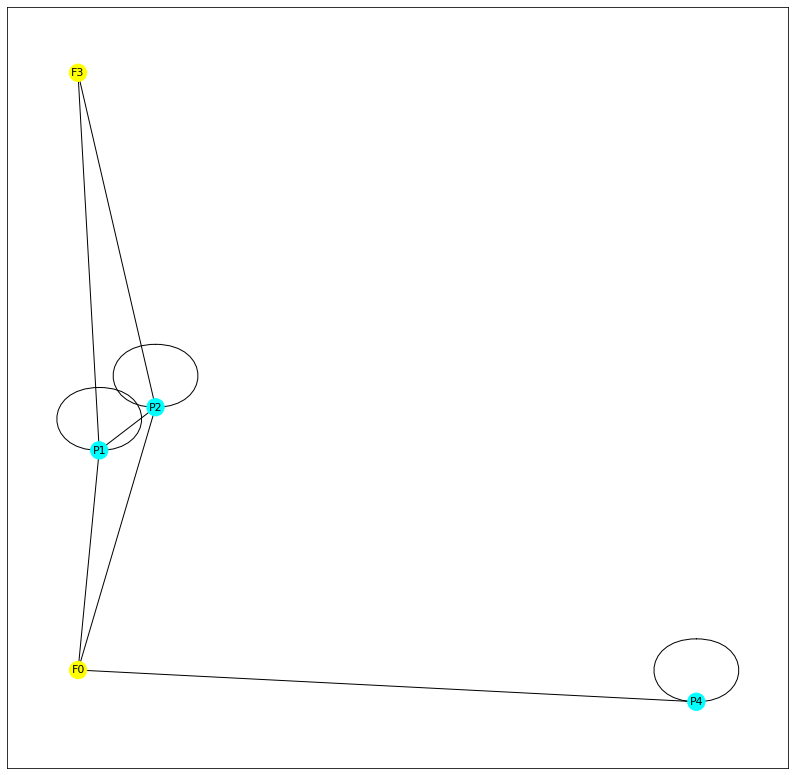

end time: 2022-12-27 18:35:46.744612
result #1: 1340722.2568448398
expected #1: 1324477.6736137536
gap #1: 1.2264897744001848

INSTANCE #2
start time: 2022-12-27 18:35:46.753888
OptimizationStatus.OPTIMAL
Revenue: 385611.92 euro
ALPHA
0: 1.0 
1: 1.0000000000000002 
2: 0.0 
3: 0.0 
4: 0.0 
5: 0.0 
6: 0.0 
7: 0.9999999999999999 
8: 0.0 
9: 0.0 
{'F2': (44.32248686451281, 78.95583420239032), 'F3': (79.41185757915866, 36.12615724174307), 'F4': (41.6103939570998, 58.42581281103214), 'F5': (76.01717738058575, 18.780840542641563), 'F6': (28.81671478120357, 67.02188581602341), 'F8': (41.314130142465885, 19.91952352050984), 'F9': (53.16994035870367, 83.23707030679826), 'P0': (38.62750686343595, 62.850117953971164), 'P1': (12.505792633559942, 98.35486051436412), 'P7': (49.96482613720124, 17.85686771635271)}


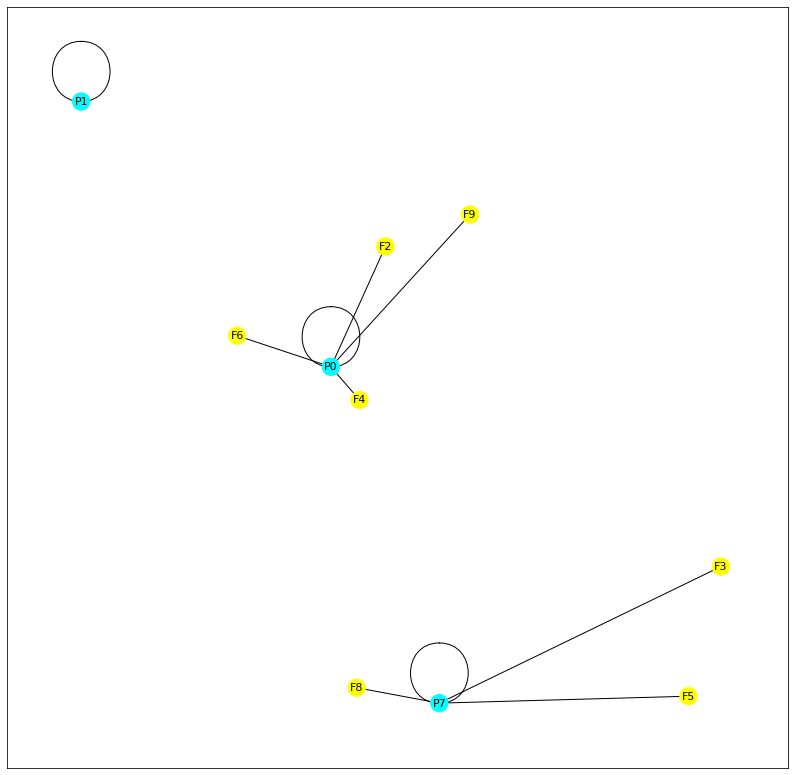

end time: 2022-12-27 18:35:47.453438
result #2: 385611.91779212654
expected #2: 385611.91779212654
gap #2: 0.0



In [85]:
#for k in {1, 2, 3, 4}:
for k in {1, 2}:
  print("INSTANCE #" + str(k))
  inst = load_instance("instance_" + str(k) + ".json")
  res = load_result("instance_" + str(k) + ".txt")
  print("start time: " + str(datetime.now()))
  obj = solve(inst, k)
  print("end time: " + str(datetime.now()))
  gap = 100 * (obj - res) / res

  print("result #" + str(k) + ": {}".format(obj))
  print("expected #" + str(k) + ": {}".format(res))
  print("gap #" + str(k) + ": {}".format(gap))
  print()

  #print in file
  with open('/content/analytics/Instance' + str(k) + '.txt', 'w') as writefile:
    writefile.write("INSTANCE #" + str(k) + "\n")
    writefile.write("start time: " + str(datetime.now()) + "\n")
    writefile.write("end time: " + str(datetime.now()) + "\n")
    writefile.write("result #" + str(k) + ": {}".format(obj) + "\n")
    writefile.write("expected #" + str(k) + ": {}".format(res) + "\n")
    writefile.write("gap #" + str(k) + ": {}".format(gap) + "\n")




#for k in {5, 6, 7, 8, 9, 10}:
#  print("INSTANCE #" + str(k))
#  inst = load_instance("instance_" + str(k) + ".json")
#  print("start time: " + str(datetime.now()))
#  obj = solve(inst)
#  print("end time: " + str(datetime.now()))
#  print("result #" + str(k) + ": {}".format(obj))
#  print()
